# 2D cellular Automata

CAs for short,

A CA is s system on cells that "live" on a 2D grid (in our case today) - universe

In practice, CAs can be any number of dimension.

These grid configuration can have any kind of connectivity (line,square,lattice,Hexagonal,array)

The game of life-a stem that exist on a 2D square lattice

Cells on this grid follow "rule" which we ireate over through "generation" (time)

Intial condition determine the final outcome of the Game of Life. Those are in practice 1"s and 0"s in a 2D array.

The game of life 2 discrete state,dead(0) or alive(1)

# rules

At each time step, the following transition occurs:

1. Any live cell with fewer than two live neighbors dies, as if by underpopulation.
2. Any live cell with two or three live neighbors live on the next generation.
3. Any live cell with more than 3 live neighbors dies, as if by overpopulation.
1. Any dead cell with exactly 3 live neighbors alive, as if by reproduction.

## compressed rules

1. any live with 2 or 3 survives
2. any dead with 3 become alive
3. all other live cells die in next generation


In [3]:
import numpy as np

universe = np.zeros((10,10))
print(universe)

universe = np.random.randint(2,size=(10,10))
print(universe)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1 1 1 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 1]
 [0 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 0 0 1]
 [0 0 1 1 1 0 1 1 1 0]
 [1 1 0 1 1 0 0 0 0 1]
 [1 0 1 0 1 1 0 0 0 0]
 [1 0 0 1 0 0 1 1 1 0]
 [1 1 1 1 0 0 1 1 1 0]
 [0 1 1 0 1 0 1 1 0 0]]


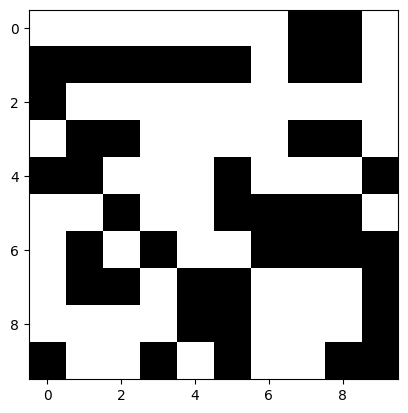

In [4]:
#visualize the universe
import matplotlib.pyplot as plt

plt.imshow(universe,cmap = "gray")

In [5]:
# use np.index

for i,j in np.ndindex(universe.shape):
    print ('i = ',i,'j = ',j)

i =  0 j =  0
i =  0 j =  1
i =  0 j =  2
i =  0 j =  3
i =  0 j =  4
i =  0 j =  5
i =  0 j =  6
i =  0 j =  7
i =  0 j =  8
i =  0 j =  9
i =  1 j =  0
i =  1 j =  1
i =  1 j =  2
i =  1 j =  3
i =  1 j =  4
i =  1 j =  5
i =  1 j =  6
i =  1 j =  7
i =  1 j =  8
i =  1 j =  9
i =  2 j =  0
i =  2 j =  1
i =  2 j =  2
i =  2 j =  3
i =  2 j =  4
i =  2 j =  5
i =  2 j =  6
i =  2 j =  7
i =  2 j =  8
i =  2 j =  9
i =  3 j =  0
i =  3 j =  1
i =  3 j =  2
i =  3 j =  3
i =  3 j =  4
i =  3 j =  5
i =  3 j =  6
i =  3 j =  7
i =  3 j =  8
i =  3 j =  9
i =  4 j =  0
i =  4 j =  1
i =  4 j =  2
i =  4 j =  3
i =  4 j =  4
i =  4 j =  5
i =  4 j =  6
i =  4 j =  7
i =  4 j =  8
i =  4 j =  9
i =  5 j =  0
i =  5 j =  1
i =  5 j =  2
i =  5 j =  3
i =  5 j =  4
i =  5 j =  5
i =  5 j =  6
i =  5 j =  7
i =  5 j =  8
i =  5 j =  9
i =  6 j =  0
i =  6 j =  1
i =  6 j =  2
i =  6 j =  3
i =  6 j =  4
i =  6 j =  5
i =  6 j =  6
i =  6 j =  7
i =  6 j =  8
i =  6 j =  9
i =  7 j =  0
i =  7

In [4]:
# Think a bit more about boundary conditions
#operator:modulo operator, return remainder of a division between two number

5%2
6%3

#we can use this simple operator to implement "wrap around" boundary condition


0

## 2D neighborhood choice

von Neumman neighborhood
The moore neighborhood

In [6]:
#let build the gol update function

def update(x):
    #get the shape of the universe
    rows, cols = x.shape
    
    #create a structure for the new universe
    xnew = np.zeros(x.shape)
    
    #find the number of living neighbor for every cell
    #do this while considering the fact that we have a moore neighborhood and warp - around boundary condition
    
    for i, j in np.ndindex(x.shape):
        total = (x[i,(j-1)%rows]#left
                 + x[i,(j+1)%rows]#right
                 + x[(i-1)%cols,j]#up
                 + x[(i+1)%cols,j]#down
                 + x[(i-1)%cols,(j-1)%rows]#upleft
                 + x[(i-1)%cols,(j+1)%rows]#upright
                 + x[(i+1)%cols,(j-1)%rows]#downright
                 + x[(i+1)%cols,(j+1)%rows])#downleft
                 
        #now implement the rules
        if x[i,j] == 1:# if the cell is alive
                 
            if (total < 2) or (total > 3):#overpopulation and underpopulation
                 xnew[i,j] = 0
            else:# any cell with 2 or 3 
                 xnew[i,j] = 1
                
        else:# equivalent to if x[i,j]==0
            if total == 3:#condition of birth
                 xnew[i,j] = 1
            else:
                 xnew[i,j] = 0
                 
    return xnew
                 
           
            
                 
        

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


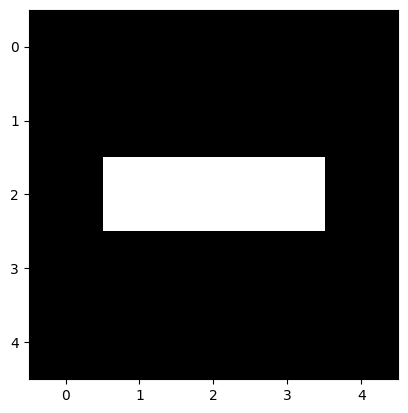

In [7]:
#so lets test the uptake function

beacon = np.zeros((5,5))
beacon[1:4,2:3] = np.ones((3,1))

print(beacon)

#plt.imshow(beacon, cmap = 'gray')

plt.imshow(update(beacon),cmap = 'gray')

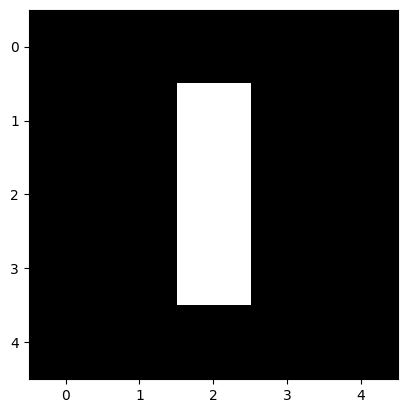

In [7]:
#Animate or visualize the simulation
from IPython.display import clear_output
from time import sleep

#define number of generation
n =100
for i in range(n):
    plt.imshow(update(beacon),cmap = 'gray')
    plt.show()
    
    sleep(.5)#make it slow
    
    beacon = update(beacon)
    
    clear_output(wait = True)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from time import sleep

def loadlife(filename):
    
    def read_grid(j, lines):
        grid = []
        
        while not lines[j].startswith('#P'):
            
            line = list(lines[j])[:-1]
            
            tx_line = [0 if item == '.' else item for item in line]
            tx_line = [1 if item == '*' else item for item in tx_line]
            
            grid.append(tx_line)
            
            j += 1
            if j == len(lines): break
                
        return grid
    
    file = open(filename, 'r')
    
    lines = file.readlines()
    
    point_map = {}
    points = []
    
    for i, line in enumerate(lines):
        if line.startswith('#P'):
            point = (int(line.split()[1]), int(line.split()[2]))
            points.append(point)
            grid = read_grid(i + 1, lines)
            point_map[point] = grid
            
    for point, grid in point_map.items():
        # find max length if grid
        max_length = max([len(row) for row in grid])

        #Add leftovers
        for row in grid:
            row.extend([0]*(max_length - len(row)))
        
    most_neg_x = min([point[0] for point in points])
    most_pos_y = max([point[1] for point in points])
    
    most_pos_x = max([point[0] + len(point_map[point][0]) - 1 for point in points])
    most_neg_y = min([point[1] - len(point_map[point]) + 1 for point in points])
    
    x_len = most_pos_x - most_neg_x + 1
    y_len = most_pos_y - most_neg_y + 1
    
    universe = [[0 for _ in range(x_len)] for _ in range(y_len)]
    
    normalized_numpized_point_map = {}
    
    for point, grid in point_map.items():
        #normalize point
        x, y = point
        
        x_n = x - most_neg_x
        y_n = (-y) + most_pos_y
        
        point_n = x_n, y_n
        normalized_numpized_point_map[point_n] = np.asarray(grid)
        
    universe = np.asarray(universe)
    universe = np.zeros((y_len,x_len))
    
    for point, grid in normalized_numpized_point_map.items():
        
        rowu = point[1]
        rowl = int(point[1] + grid.shape[0])
        coll = point[0]
        colr = int(point[0] + grid.shape[1])
        
    
#         print('col dif ', colr-coll)
#         print('cols in universe ', universe.shape[1])
#         print('row dif ', rowl-rowu)
#         print('rows in universe ', universe.shape[0])
#         print('grid shape', grid.shape)
#         print('rowu ', rowu, 'row l ', rowl)
        
        universe[rowu:rowl, coll:colr] = grid
    
    return universe


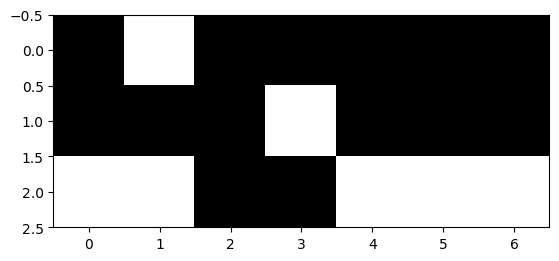

In [9]:
filename = 'lifep/ACORN.LIF'

seed = loadlife(filename)

plt.imshow(seed,cmap = 'gray')

In [10]:
#floor division
def ceil(a,b):
    return -(-a//b)

def plant_seed(seed,nrow,ncol):
    #generate the blank universe that we "plant" the seed into
    soil = np.zeros((nrow,ncol))
    
    rowu = soil.shape[0]//2 + seed.shape[0]//2
    rowl = ceil(soil.shape[0],2) - ceil(seed.shape[0],2)
    colu = soil.shape[1]//2 + seed.shape[1]//2
    coll = ceil(soil.shape[1],2) - ceil(seed.shape[1],2)
    
    #plant the seed with the generatd indices
    soil[rowl:rowu,coll:colu] = seed
    
    planted_seed = soil
    return planted_seed

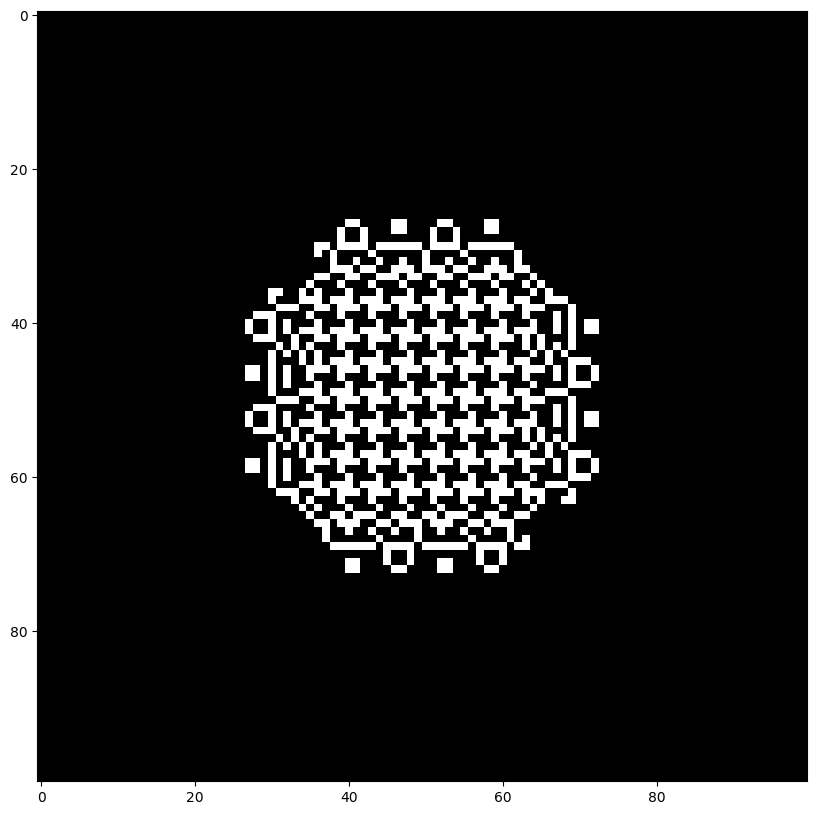

In [11]:
filename = 'lifep/QUILT.LIF'
seed = loadlife(filename)

universe = plant_seed(seed,100,100)

plt.figure(figsize = (10,10))
plt.imshow(universe,cmap = 'gray')

In [12]:
from IPython.display import clear_output
from time import sleep

#define number of generation
def animatelife(x,n):
    for i in range(n):
        plt.imshow(x,cmap = 'gray')
        plt.axis('off')
        plt.show()
        
        x = update(x)
        
        clear_output(wait = True)
        


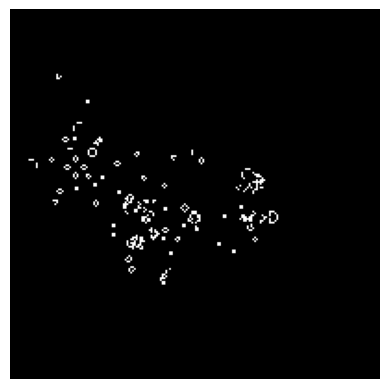

In [13]:
filename = 'lifep/ACORN.LIF'

seed = loadlife(filename)
universe = plant_seed(seed,200,200)

n = 1000

animatelife(universe,n)

## excitable systems

excitable system is one where a small input leads to a relatively large output

when excitable systems are coupled in space - they lead to waves

* brain waves
* electrical biofilms
* developmental signal (somitogenesis)


## rules for an excitable system

1) if any cell in state 0 has at leats one of it's neighbor in state 1, it becomes a 1 in next generation
2) if any cell in state non zero then it advance by one at the next time step
3) if a cell us in its Max state, in next generation it return 0
4) if a cell in state 0 and none of its neighbors are 1, it remain a 0

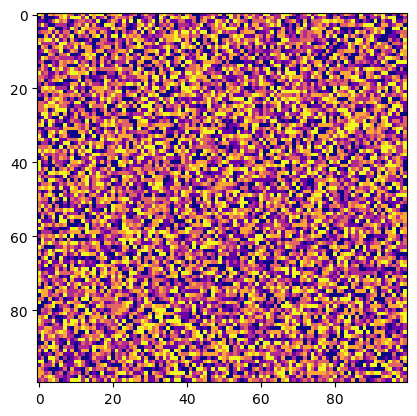

In [14]:
universe = np.random.randint(6,size = (100,100))
plt.imshow(universe,cmap ='plasma' )

In [15]:
#define number of generation with diff color
def animatelife(x,n,update,colstr):
    for i in range(n):
        plt.imshow(x,cmap = 'plasma')
        plt.axis('off')
        plt.show()
        
        x = update(x)
        
        clear_output(wait = True)

In [16]:
def excitable(x):
    
    rows,cols = x.shape
    xnew = np.zeros(x.shape)
    
    for i,j in np.ndindex(x.shape):
        nh = np.array([x[i,(j-1)%rows],x[i,(j+1)%rows],
                       x[(i-1)%cols,j],x[(i+1)%cols,j],
                       x[(i-1)%cols,(j+1)%rows],
                       x[(i-1)%cols,(j-1)%rows],
                       x[(i+1)%cols,(j+1)%rows],
                       x[(i+1)%cols,(j-1)%rows]])
        #now implement the rules for an excitable system
        
        if (x[i,j] == 0) & (np.sum(nh == 1) >= 1):
            xnew[i,j] = 1
        elif x[i,j] == 10:
            xnew[i,j] = 0
        elif x[i,j] >= 1:
            xnew[i,j] = x[i,j] + 1
            
    return xnew

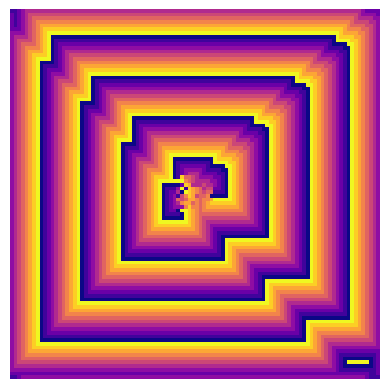

In [17]:
universe = np.zeros((100,100))

universe[45:55,45:55] = np.random.randint(11,size = (10,10))

animatelife(universe,500,excitable,'plasma')